In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DBDA/PG-DBDA Sept 22/Study material/Practical_Machine_Learning/Day9/house_price_prediction.csv")

In [ ]:
df.shape

(17210, 19)

In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

# Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17210 entries, 0 to 17209
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             17210 non-null  int64  
 1   date           17210 non-null  object 
 2   price          17210 non-null  int64  
 3   bedrooms       17210 non-null  int64  
 4   sqft_living    17210 non-null  int64  
 5   sqft_lot       17210 non-null  int64  
 6   floors         17210 non-null  float64
 7   waterfront     17210 non-null  int64  
 8   condition      17210 non-null  int64  
 9   grade          17210 non-null  int64  
 10  sqft_above     17210 non-null  int64  
 11  sqft_basement  17210 non-null  int64  
 12  yr_built       17210 non-null  int64  
 13  yr_renovated   17210 non-null  int64  
 14  zipcode        17210 non-null  int64  
 15  lat            17210 non-null  float64
 16  long           17210 non-null  float64
 17  sqft_living15  17210 non-null  int64  
 18  sqft_l

## Power Transform those numeric features which are skewed

### method 1 : check skewness

Skewness should be close to 0

In [ ]:
df.skew()

<ipython-input-6-9e0b1e29546f>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


id                0.241903
price             3.821753
bedrooms          2.400169
sqft_living       1.472594
sqft_lot         13.627634
floors            0.614256
waterfront       10.992823
condition         1.062413
grade             0.797259
sqft_above        1.416897
sqft_basement     1.597025
yr_built         -0.482446
yr_renovated      4.552460
zipcode           0.405812
lat              -0.479820
long              0.874497
sqft_living15     1.110448
sqft_lot15        8.972974
dtype: float64

In [ ]:
df.nunique()

id               17210
date               366
price             3206
bedrooms            12
sqft_living        950
sqft_lot          8514
floors               6
waterfront           2
condition            5
grade               11
sqft_above         859
sqft_basement      293
yr_built           116
yr_renovated        70
zipcode             70
lat               4848
long               721
sqft_living15      718
sqft_lot15        7592
dtype: int64

### method 2 : check histograms

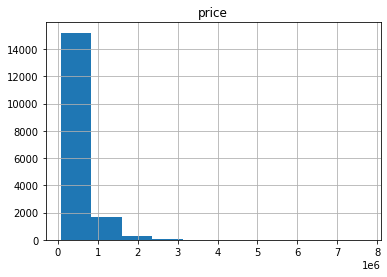

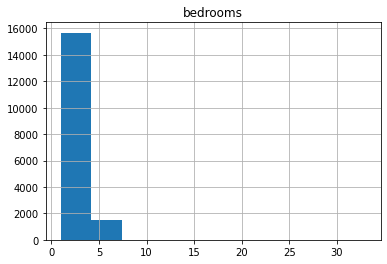

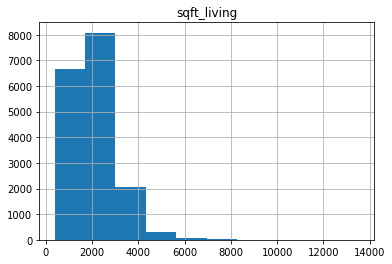

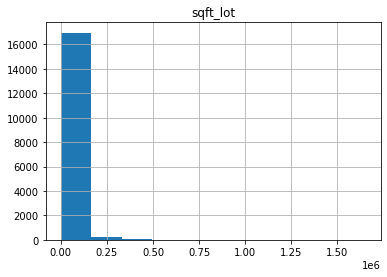

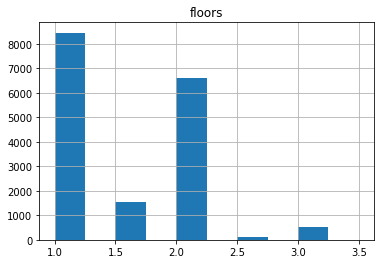

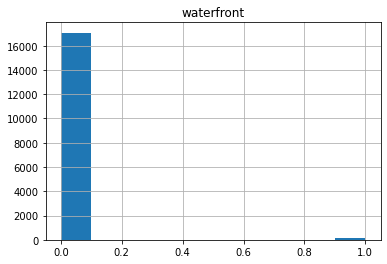

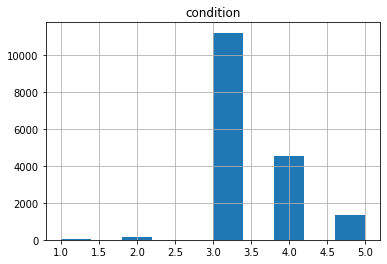

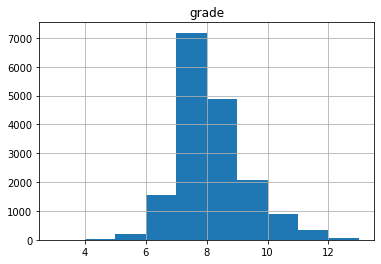

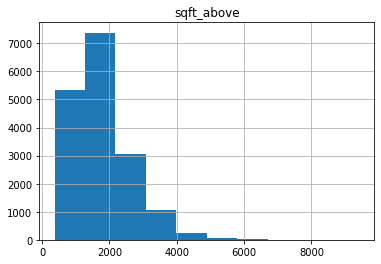

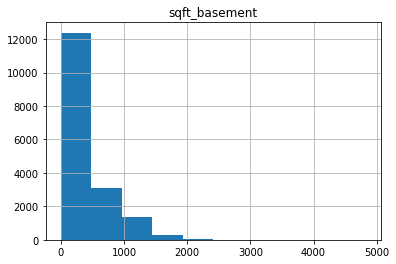

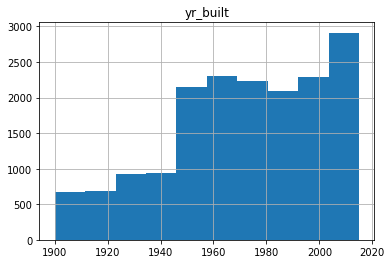

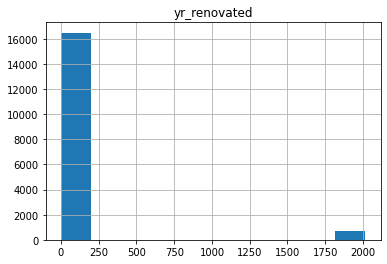

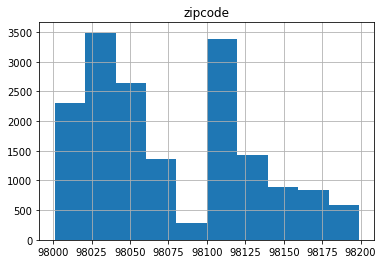

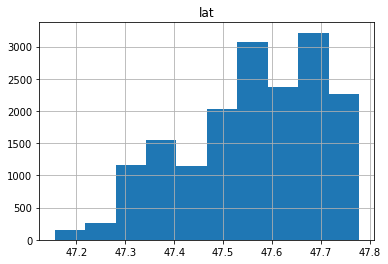

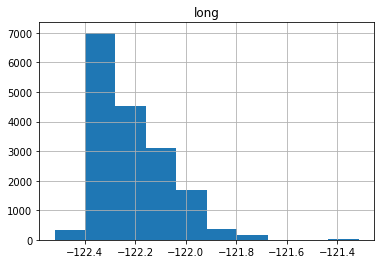

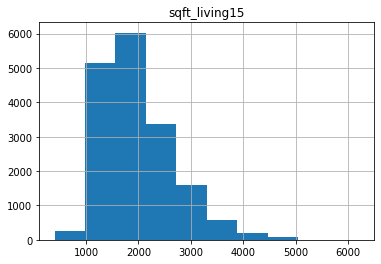

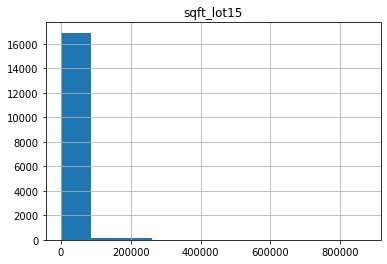

In [ ]:
import matplotlib.pyplot as plt
for col in df.columns[2:]:
    df[[col]].hist()
    plt.show()

### method 3 check boxplots

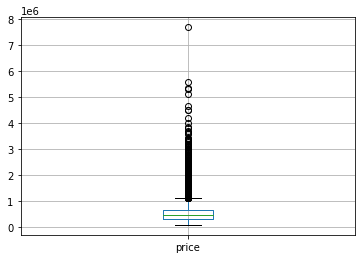

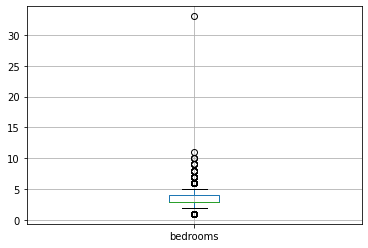

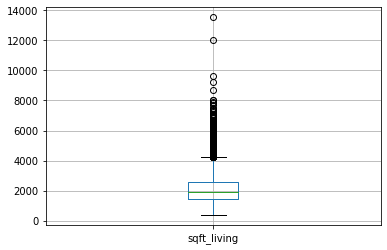

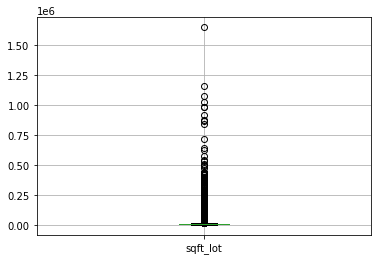

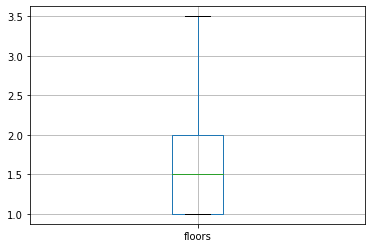

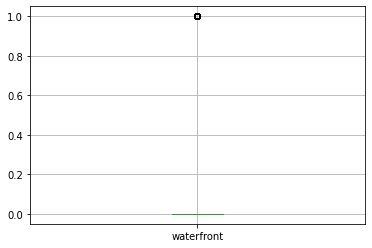

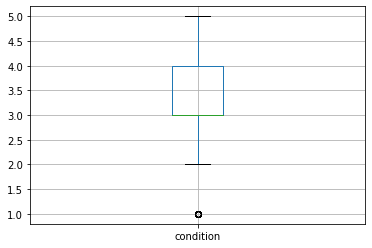

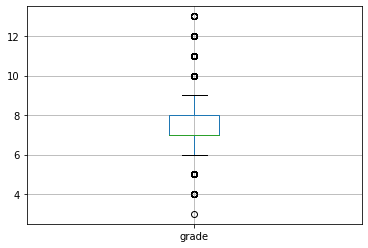

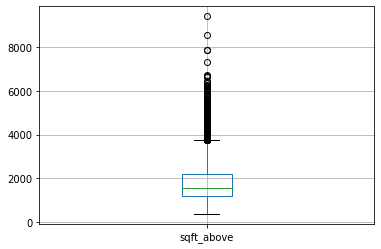

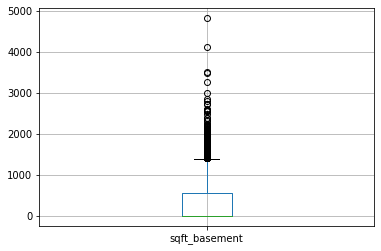

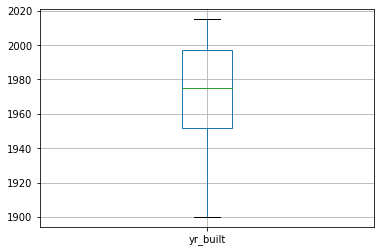

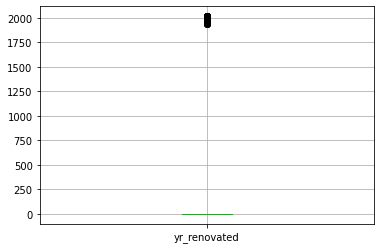

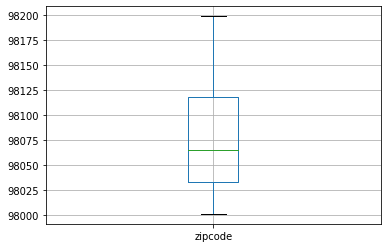

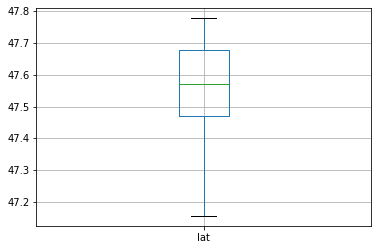

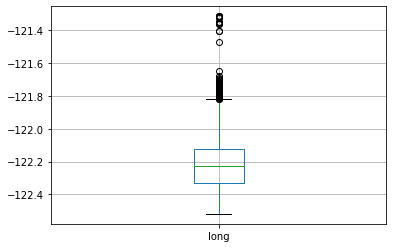

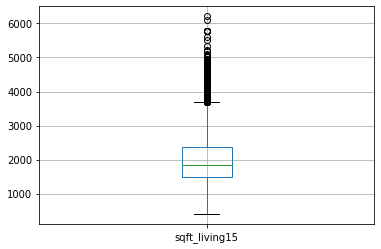

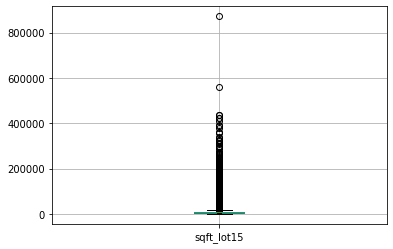

In [ ]:
import matplotlib.pyplot as plt
for col in df.columns[2:]:
    df[[col]].boxplot()
    plt.show()

### Select columns which have very high skewness ( either right / left  i..e positive / negative)

- don't select id / unique value columns

- don't select categorical columns

- Select only numeric columns which are not id / unique values

### In this case : price, sqft_above, sqft_basement, sqft_living, sqft_living15, sqft_lot and sqft_lot15

# Apply Power transform on skewed columns

# Types of power transforms

- log transform

ONLY for +ve values

- box-cox transform

ONLY for +ve values

- yeo-johnson transform

for both +ve and -ve values

Extra methods:

- inverse transform

- square root transform

- square transform


In [ ]:
skewed_col = ['sqft_above', 'sqft_basement', 'sqft_living',
              'sqft_living15', 'sqft_lot' , 'sqft_lot15']

In [ ]:
df.loc[:,skewed_col].describe()

,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15
count,17210.000000,17210.000000,17210.000000,17210.000000,1.721000e+04,17210.000000
mean,1788.108077,292.063974,2080.172051,1987.480244,1.513545e+04,12785.612028
std,824.994890,443.397892,917.995097,684.866281,4.260361e+04,27294.470122
min,370.000000,0.000000,370.000000,399.000000,5.200000e+02,659.000000
25%,1190.000000,0.000000,1420.000000,1490.000000,5.034000e+03,5100.000000
50%,1560.000000,0.000000,1910.000000,1840.000000,7.620000e+03,7620.000000
75%,2210.000000,560.000000,2550.000000,2368.250000,1.070075e+04,10092.000000
max,9410.000000,4820.000000,13540.000000,6210.000000,1.651359e+06,871200.000000


## Log Transform

x_new = log(x_old+1)

for right skewed data

x_new = log((max_x_old - x_old) +1)

for left skewed data

In [ ]:
import numpy as np

In [ ]:
df_log = df.copy()

In [ ]:
for col in skewed_col:
    df_log[col] = np.log(df[col]+1)

In [ ]:
df_log.loc[:,skewed_col].describe()

,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15
count,17210.000000,17210.000000,17210.000000,17210.000000,17210.000000,17210.000000
mean,7.395960,2.533166,7.551357,7.540626,8.986682,8.959104
std,0.425913,3.171632,0.423400,0.326828,0.905648,0.816596
min,5.916202,0.000000,5.916202,5.991465,6.255750,6.492240
25%,7.082549,0.000000,7.259116,7.307202,8.524169,8.537192
50%,7.353082,0.000000,7.555382,7.518064,8.938663,8.938663
75%,7.701200,6.329721,7.844241,7.770328,9.278163,9.219597
max,9.149634,8.480737,9.513477,8.734077,14.317110,13.677628


In [ ]:
df_log.loc[:,skewed_col].skew()

sqft_above       0.262402
sqft_basement    0.482130
sqft_living     -0.018439
sqft_living15    0.208597
sqft_lot         0.941802
sqft_lot15       0.953113
dtype: float64

## Box-Cox Transform

In [ ]:
from sklearn.preprocessing import power_transform

In [ ]:
df_bc = df.copy()

In [ ]:
df_bc['sqft_basement'] +=1

In [ ]:
df_bc.loc[:,skewed_col].describe()

,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15
count,17210.000000,17210.000000,17210.000000,17210.000000,1.721000e+04,17210.000000
mean,1788.108077,293.063974,2080.172051,1987.480244,1.513545e+04,12785.612028
std,824.994890,443.397892,917.995097,684.866281,4.260361e+04,27294.470122
min,370.000000,1.000000,370.000000,399.000000,5.200000e+02,659.000000
25%,1190.000000,1.000000,1420.000000,1490.000000,5.034000e+03,5100.000000
50%,1560.000000,1.000000,1910.000000,1840.000000,7.620000e+03,7620.000000
75%,2210.000000,561.000000,2550.000000,2368.250000,1.070075e+04,10092.000000
max,9410.000000,4821.000000,13540.000000,6210.000000,1.651359e+06,871200.000000


In [ ]:
df_bc.loc[:, skewed_col] = power_transform(df_bc.loc[:, skewed_col],
                            method = "box-cox")

In [ ]:
df_bc.loc[:, skewed_col].skew()

sqft_above       0.013694
sqft_basement    0.449189
sqft_living     -0.000168
sqft_living15    0.005206
sqft_lot        -0.103977
sqft_lot15      -0.111873
dtype: float64

# Transform the target Column

- its not compulsory to power transform the target column

- HERE it is done as an example ONLY

In [ ]:
# log transform the target column 'price'

df_log['price'] = np.log(df['price'])

In [ ]:
df_log['price'].skew(), df['price'].skew()

(0.4363253357082314, 3.82175313608007)

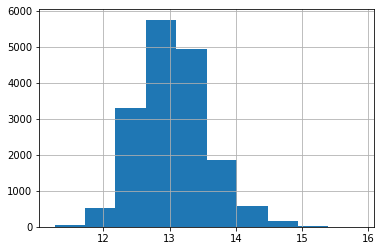

In [ ]:
df_log['price'].hist()

# Feature Engineering

Curate new features from existing

new features are more relevant to current problem



In [ ]:
# convert date and yr_build to create age of the house
# date column is object
# So convert it to datetime

df_log['date'] = pd.to_datetime(df_log['date'])

In [ ]:
df_log['date'].dtypes

dtype('<M8[ns]')

In [ ]:
df_log['house_age'] = df_log['date'].dt.year - df_log['yr_built']

In [ ]:
df_log['house_age'].describe()

count    17210.000000
mean        43.030854
std         29.376780
min         -1.000000
25%         17.000000
50%         39.000000
75%         63.000000
max        115.000000
Name: house_age, dtype: float64

In [ ]:
# create another feature
df_log['year_sell'] = df_log['date'].dt.year

In [ ]:
df_log.drop(['date', 'yr_built'], axis=1, inplace=True)

# X & Y

In [ ]:
X = df_log.drop(['id','price'], axis=1)
y = df_log.loc[:,'price']

In [ ]:
X.shape,y.shape

((17210, 17), (17210,))

In [ ]:
X.columns

Index(['bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'house_age',
       'year_sell'],
      dtype='object')

# Feature Selection

- PCA

- Select From Model :: LASSO, DecisionTreeRegressor

- RFE

## PCA

## DecisionTreeRegressor

## LASSO

In [ ]:
from sklearn.linear_model import Lasso

## alpha =1

In [ ]:
lasso = Lasso(random_state=7)

In [ ]:
lasso.fit(X,y)

Lasso(random_state=7)

In [ ]:
lasso.coef_

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.00015955,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.00078222,  0.        ])

In [ ]:
lasso = Lasso(alpha=0.01, random_state=7)

In [ ]:
lasso.fit(X,y)
lasso.coef_

array([ 0.00000000e+00,  1.88242169e-01, -0.00000000e+00,  6.55830436e-02,
        0.00000000e+00,  2.85742075e-02,  2.35575486e-01,  7.35263772e-02,
        1.63922021e-02,  5.32067091e-05, -1.21612303e-04,  7.46708868e-01,
       -0.00000000e+00,  1.22545838e-01, -0.00000000e+00,  4.02252404e-03,
        0.00000000e+00])

In [ ]:
X.columns[lasso.coef_>0]

Index(['sqft_living', 'floors', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_renovated', 'lat', 'sqft_living15', 'house_age'],
      dtype='object')

### SelectFromModel

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
sfm = SelectFromModel(Lasso(alpha=0.01, random_state=7),
                      threshold = "1.25*mean")

In [ ]:
sfm.fit(X,y)

SelectFromModel(estimator=Lasso(alpha=0.01, random_state=7),
                threshold='1.25*mean')

In [ ]:
sfm.get_feature_names_out()

array(['sqft_living', 'grade', 'lat', 'sqft_living15'], dtype=object)

In [ ]:
trans_X = pd.DataFrame(sfm.transform(X),
                       columns = sfm.get_feature_names_out())

In [ ]:
trans_X.shape

(17210, 4)

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(trans_X,y,
                                                 test_size=0.3,
                                                 random_state=7)

In [ ]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((12047, 4), (5163, 4), (12047,), (5163,))

# Apply the Regression Algorithm


- Linear Regression

- Lasso

- Ridge

- Elasticnet

- SGDRegressor

In [ ]:
from sklearn.linear_model import LinearRegression,Lasso, \
Ridge, ElasticNet, SGDRegressor

In [ ]:
model_list = [LinearRegression(),Lasso(alpha=0.01,random_state=7),
              Ridge(random_state=7), ElasticNet(random_state=7),
              SGDRegressor(max_iter=100, random_state=7)]

In [ ]:
from sklearn.metrics import mean_absolute_error,\
mean_squared_error, r2_score


In [ ]:
def evalModel(model, X_train,X_test,Y_train,Y_test):
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    mae = mean_absolute_error( Y_test, Y_pred)
    mse = mean_squared_error( Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)
    print(model.__class__ )
    print(mae,mse,r2)
    return mae,mse,r2

In [ ]:
for model in model_list:
    evalModel(model, X_train,X_test,Y_train,Y_test)

<class 'sklearn.linear_model._base.LinearRegression'>
0.22561767035420088 0.0846472209228044 0.6971719813256343
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
0.2363702191633748 0.091240726187389 0.6735835148216474
<class 'sklearn.linear_model._ridge.Ridge'>
0.22566224757980918 0.08464366141225935 0.6971847155833459
<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>
0.41257556654005306 0.2796097146765435 -0.0003122958380652463
<class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'>
45410.9214647071 2968745202.473006 -10620776650.767532


# Create model for the user

Because target is log transformed

User need to see predictions after doing inverse transform

inverse transform of log(x) is e^x

In [ ]:
model = Ridge(random_state=7)

In [ ]:
model.fit(X_train,Y_train)

Ridge(random_state=7)

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
Y_pred_inv = np.exp(Y_pred)

In [ ]:
Y_pred[:5]

array([13.40108849, 12.98654543, 13.12666299, 12.67713297, 13.70654462])

In [ ]:
Y_pred_inv[:5]

array([660722.02521363, 436500.77392243, 502154.43608695, 320338.32233361,
       896760.96333142])

# Parameter Tuning

Lets tune Ridge Model

alpha

max_iter

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid={
    "alpha" : [0.01 , 0.1, 0.2 ],
    "max_iter" : [20, 50, 2000]
}

In [ ]:
gscv = GridSearchCV(Ridge(random_state=7), param_grid, cv=2, verbose=2)

In [ ]:
gscv.fit(X_train,Y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ............................alpha=0.01, max_iter=20; total time=   0.0s
[CV] END ............................alpha=0.01, max_iter=20; total time=   0.0s
[CV] END ............................alpha=0.01, max_iter=50; total time=   0.0s
[CV] END ............................alpha=0.01, max_iter=50; total time=   0.0s
[CV] END ..........................alpha=0.01, max_iter=2000; total time=   0.0s
[CV] END ..........................alpha=0.01, max_iter=2000; total time=   0.0s
[CV] END .............................alpha=0.1, max_iter=20; total time=   0.0s
[CV] END .............................alpha=0.1, max_iter=20; total time=   0.0s
[CV] END .............................alpha=0.1, max_iter=50; total time=   0.0s
[CV] END .............................alpha=0.1, max_iter=50; total time=   0.0s
[CV] END ...........................alpha=0.1, max_iter=2000; total time=   0.0s
[CV] END ...........................alpha=0.1, ma

GridSearchCV(cv=2, estimator=Ridge(random_state=7),
             param_grid={'alpha': [0.01, 0.1, 0.2], 'max_iter': [20, 50, 2000]},
             verbose=2)

In [ ]:
gscv.best_score_

0.7052924508245481

In [ ]:
gscv.best_params_

{'alpha': 0.1, 'max_iter': 20}

# Create the best Ridge Model

Use the best params from Grid Search Cv

In [ ]:
rdge = Ridge(alpha= 0.1 , max_iter = 20, random_state = 7)

In [ ]:
rdge.fit(X_train,Y_train)

Ridge(alpha=0.1, max_iter=20, random_state=7)

In [ ]:
Y_pred = model.predict(X_test)
mae = mean_absolute_error( Y_test, Y_pred)
mse = mean_squared_error( Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

In [ ]:
mae,mse,r2

(0.22566224757980918, 0.08464366141225935, 0.6971847155833459)